# Asset Pricing

The felicity function is $u(c) = 1 - c^{-1}$

The set of states is $S + {s_1, s_2}$

Let $c(s_1) = 1$ and $c(s_2) = 1.05$

The subjective discount factor is $\beta = 0.97$

The return on the stock is $r = [1, 1.05]^T$

M = [
    [0.8, 0.2],
    [0.1, 0.9]
    ]

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe

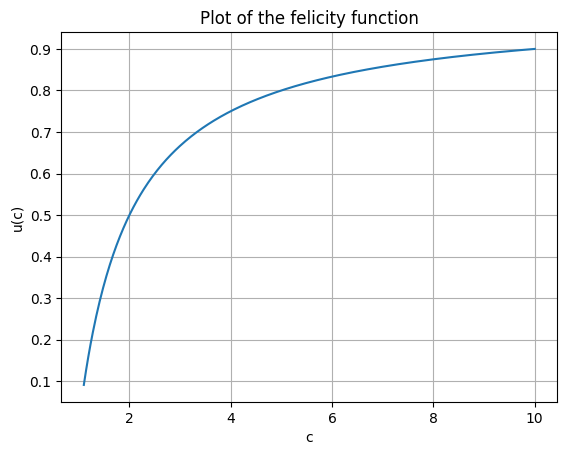

In [5]:
# graphing the felicity function

def ff(c):
    return 1 - c ** -1

# Generate a range of values for c
c_values = np.linspace(1.1, 10, 400)  # Avoid division by zero by starting from 1.1

# Calculate the corresponding values of f(c)
f_values = ff(c_values)

# Create the plot
plt.plot(c_values, f_values, label=r'$f(c) = 1 - c^{-1}$')
plt.xlabel('c')
plt.ylabel('u(c)')
plt.title('Plot of the felicity function')
plt.grid(True)
plt.show()


The felicity function represents diminishing returns to consumption

# Asset Price Equation as a Function of the State

The individuals utility is represented by $u(c_0 -qz) + \beta[\pi_1 u(c_1(s_1) + r_1 z) + \pi_2u(c_1(s_2) + r_2z)]$

where q = price, z = quantity purchased. We maximize with respect to z

$\implies 0 = -qu'(c_0-qz) + \beta[\pi_1 u'(c_1(s_1) + r_1 z)r_1 + \pi_2u(c_1(s_2) + r_2 z)r_2]$

Because the optimal price will lead us indifferent to buying a unit of the good, we set z = 0, to find 

$q = \frac{\beta}{u'(c_0)}[\pi_1 u'(c_1(s_1))r_1 + \pi_2u'(c_1(s_2))r_2]$

The probabilities $\pi_1$ and $\pi_2$ will vary based on the current state, and are given to us in the markov matrix

$$
\implies q(s_i) = 
\begin{cases}
\frac{\beta}{u'(c(s_1))}[(0.8) u'(c(s_1))r_1 + (0.2)u(c(s_2))r_2], & \text{if  } i = 1 \\
\frac{\beta}{u'(c(s_2))}[(0.1) u'(c(s_1))r_1 + (0.9)u(c(s_2))r_2], & \text{if  } i = 2 
\end{cases}

$$



# Asset Price for Each state

If we plug in the parameter values given above, we find the following;

$q(s_1) = 0.97 (0.8 + 0.191) = 0.96$

and $q(s_2) = 1.05$

# Long-Run Distribution of States

We can leverage the quant econ package to derive the stationary distribution for M. This is the distribution such that $[\pi_1, \pi_2]M = [\pi_1, \pi_2]$

In [7]:
M = [
    [0.8, 0.2],
    [0.1, 0.9]
    ]

mc = qe.MarkovChain(M)
mc.stationary_distributions  # Show all stationary distributions

array([[0.33333333, 0.66666667]])

# Long Run Average Price of Stock

The long run average price of a stock will be determined by the stationary distribution. We simply take the expected value of the price;

$E[q(s_i)] = \pi_1 * q(s_1) + \pi_2 * q(s_2) = 0.33 * 0.96 + 0.66 * 1.05 = 1.01$